# Nuages de mots

## Imports et stopwords

In [41]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdeganck\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "leurs", "petit", "ecr", "tél", "rue", "francs", "etc", "app", "quand", "sér", "chez", "jours", "chaussée", "toute", "heures", "avant", "près", "tant", "avenue", "ceux", "celui", "quelque", "quelques", "jamais", "vers", "rien", "année", "puis", "devant"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [43]:
# Choisir une année
year = 1906

In [44]:
# Lister les fichiers de cette année
data_path = '../../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

101

In [45]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [46]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

101

In [47]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'Veadredi 5 JaaYÎer 1906,3! Edition ABONNEMENT pour toute la Belgique : S mois, fr.2.25; 6 mois, tr. 4.25; 4 an, 8 te. --issai*- Le SOER est distribué dans toute l’agglomération bruxelloise (rez-do* ch'

In [48]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [49]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'Veadredi 5 JaaYÎer 1906,3! Edition ABONNEMENT pour toute la Belgique : S mois, fr.2.25; 6 mois, tr. 4.25; 4 an, 8 te. --issai*- Le SOER est distribué dans toute l’agglomération bruxelloise (rez-do* chaussée) contre 30 centimes par moi*, montant des Irais d’envoL Abonuornect d\'étage : 60 cent, par mois* Hollande et Grand-Duché 4 6 fr. par an. - Pays do l\'Union postale 24 Ir. par a "- On peut s aoùnner à tous les bureetust d§ jjoste étaux facteurs en tournis. . . TIRAGE: 150.000 EXEMPlj No 5 parai'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [50]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 3 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [51]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1906_clean.txt!'

In [52]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'VEADREDI JAAYÎER EDITION ABONNEMENT BELGIQUE MOIS MOIS ISSAI SOER DISTRIBUÉ AGGLOMÉRATION BRUXELLOISE CENTIMES MONTANT IRAIS ENVOL ABONUORNECT ÉTAGE CENT MOIS HOLLANDE GRAND DUCHÉ PAYS UNION POSTALE AOÙNNER BUREETUST JJOSTE ÉTAUX FACTEURS TOURNIS TIRAGE EXEMPLJ PARAISSENT PAGES BUREAUX PLAGE LOUVAIN REDACTION TÉLÉPHONES ADMINISTRATION TÉLÉPHONE ÉDITIONSPAR JOUR ÀSTLETB INSERTIONS PETITES ANNONCES LIGNES PETITE LIGNE FAITS CORPS LIGUE FAITS DIVERS RÉPARATIONS JUDICIAIRES LIGNE SPORT CARNET MODE N'

## Nuage de mots

### Afficher les termes les plus fréquents


In [53]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BRUXELLES', 2062), ('PRIX', 1774), ('MAISON', 1594), ('DEMANDE', 1468), ('TRÈS', 1410), ('FILLE', 1158), ('MIDI', 1068), ('LOUER', 1030), ('PLACE', 976), ('GRAND', 956)]


### Créer, stocker et afficher le nuage de mots

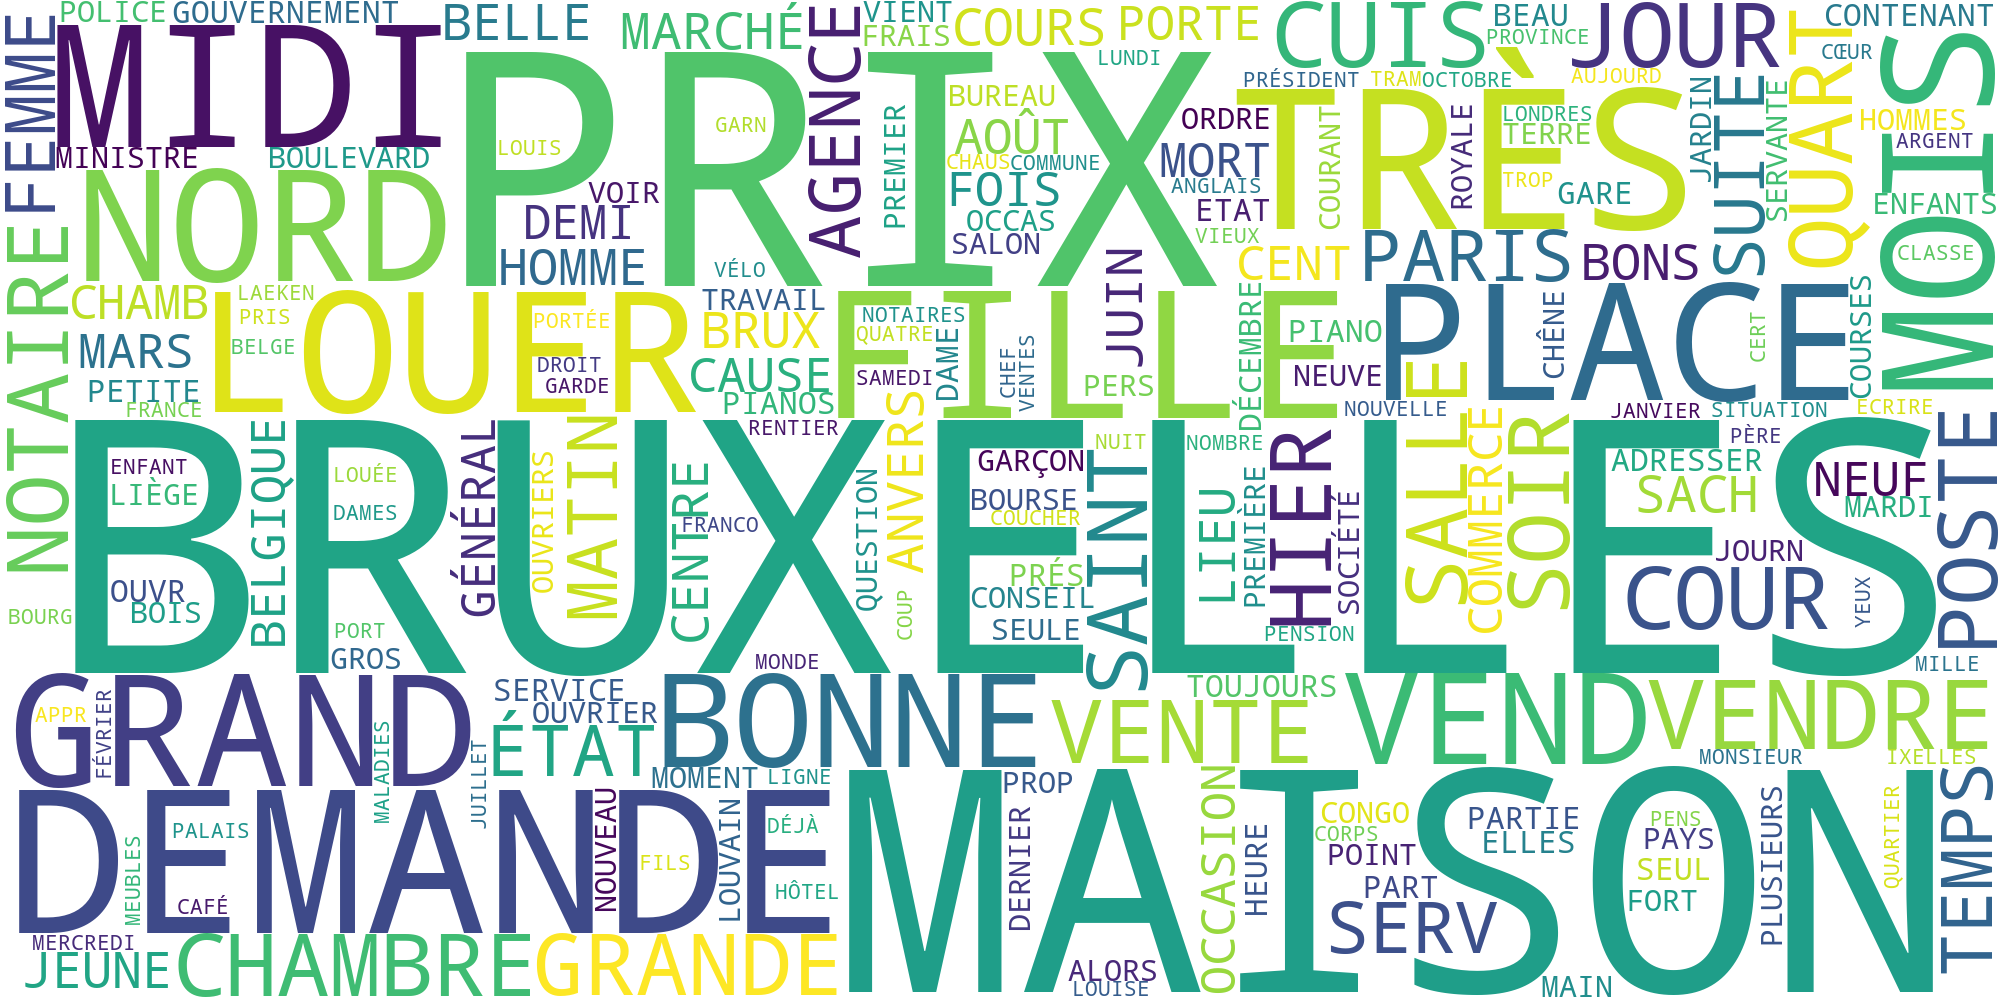

In [54]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))